# Data

In [1]:
from pandas import DataFrame
x_train=DataFrame([i for i in range(1,16)], columns=['x'])
y_train=DataFrame([0]*5+[1]*5+[0]*5, columns=['y'])
x_test=DataFrame([3.5, 5.5, 8.5, 13, 15.5], columns=['x'])
y_test=DataFrame([0, 0, 1, 0, 0], columns=['y'])

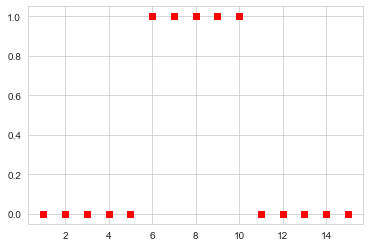

In [2]:
# Plot the data to have a look
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x_train, y_train, c='r', marker='s')

In [3]:
# Let standardize the data
from sklearn import preprocessing
standard_scaler=preprocessing.StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

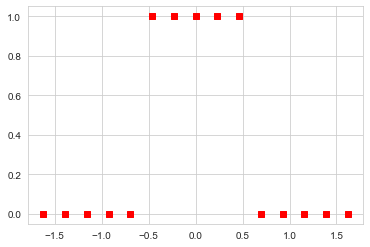

In [4]:
# Plot the data to have a look
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x_train, y_train, c='r', marker='s')

# Epoch Training

In [38]:
# Assign random number for the parameters

In [54]:
import tensorflow as tf
# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random.normal([1, 3], stddev=1), name='W1')
b1 = tf.Variable(tf.random.normal([3]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random.normal([3, 2], stddev=1), name='W2')
b2 = tf.Variable(tf.random.normal([2]), name='b2')

In [55]:
x_input = tf.reshape(x_train, (x_train.shape[0], -1))
x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), W1), b1)

In [56]:
x = tf.nn.relu(x)

In [57]:
logits=tf.add(tf.matmul(x, W2), b2)

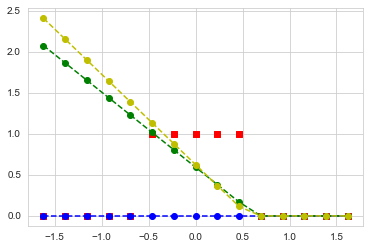

In [58]:
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x_train, y_train, c='r', marker='s')
plt.plot(x_train, x[:,0], linestyle='--', marker='o', color='b')
plt.plot(x_train, x[:,1], linestyle='--', marker='o', color='g')
plt.plot(x_train, x[:,2], linestyle='--', marker='o', color='y')
# plt.plot(x_train, x[:,0]+ x[:,1]+ x[:,2], linestyle='--', marker='o', color='black')

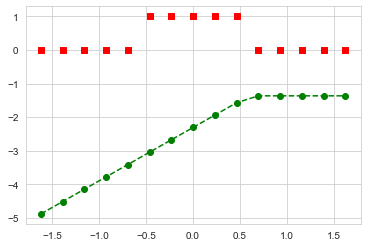

In [59]:
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x_train, y_train, c='r', marker='s')
# plt.plot(x_train, logits[:,0], linestyle='--', marker='o', color='b')
plt.plot(x_train, logits[:,1], linestyle='--', marker='o', color='g')

In [46]:
# Loss function
def loss_fn(logits, labels):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=logits))
    return cross_entropy

In [47]:
# setup the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.4)

In [15]:
batch_x=tf.Variable(x_train)
batch_y=tf.Variable(y_train)
batch_y=tf.one_hot(batch_y, 2)

In [50]:
def nn_model(x_input, W1, b1, W2, b2):
    # flatten the input image from 28 x 28 to 784
    x_input = tf.reshape(x_input, (x_input.shape[0], -1))
    x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), W1), b1)
    x = tf.nn.relu(x)
    logits = tf.add(tf.matmul(x, W2), b2)
    return logits

loss=0.482


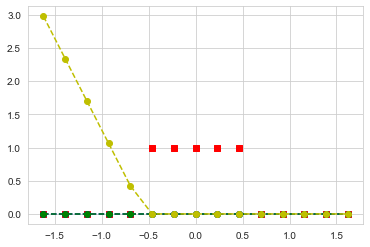

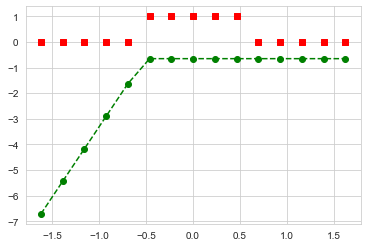

loss=0.167


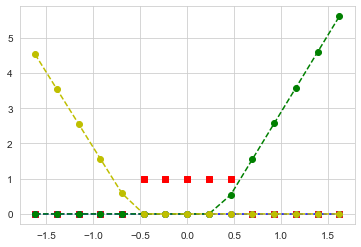

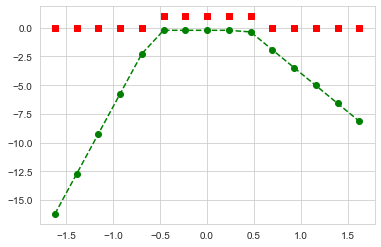

loss=0.013


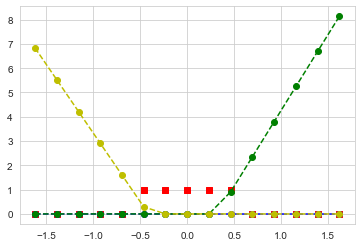

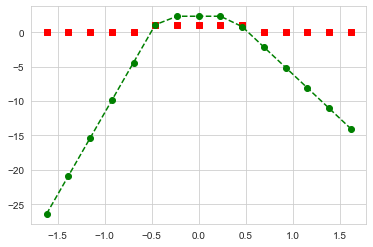

loss=0.006


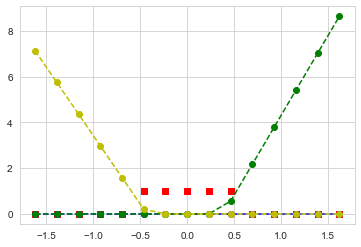

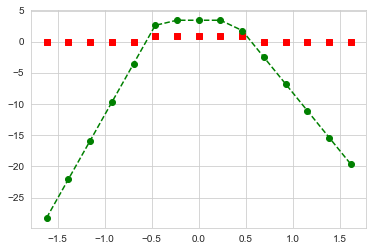

loss=0.002


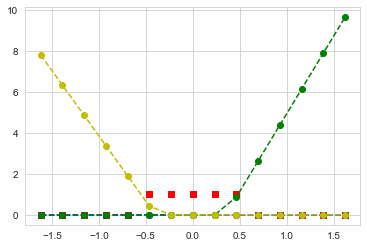

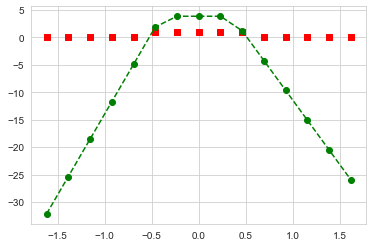

In [64]:
epochs=50
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        logits= nn_model(batch_x, W1, b1, W2, b2)
        loss=loss_fn(logits, batch_y)
    gradients=tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    
    x_input = tf.reshape(x_train, (x_train.shape[0], -1))
    x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), W1), b1)
    
    x = tf.nn.relu(x)
    
    if (epoch+1)%10==0:
        
        print(f'loss={loss:.3f}')
    
        %matplotlib inline
        sns.set_style('whitegrid')
        plt.scatter(x_train, y_train, c='r', marker='s')
        plt.plot(x_train, x[:,0], linestyle='--', marker='o', color='b')
        plt.plot(x_train, x[:,1], linestyle='--', marker='o', color='g')
        plt.plot(x_train, x[:,2], linestyle='--', marker='o', color='y')
        plt.show()

        %matplotlib inline
        sns.set_style('whitegrid')
        plt.scatter(x_train, y_train, c='r', marker='s')
#         plt.plot(x_train, logits[:,0], linestyle='--', marker='o', color='b')
        plt.plot(x_train, logits[:,1], linestyle='--', marker='o', color='g')
        plt.show()

In [65]:
# Let's check how well the neural network fit into the training dataset
tf.argmax(logits, axis=1)

<tf.Tensor: shape=(15,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)>

In [66]:
import numpy as np
np.array(y_train).reshape(1,-1)

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]], dtype=int64)

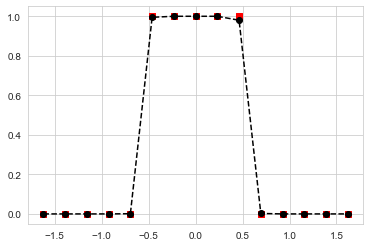

In [67]:
# Let's check how well the y=1 curve fit the real distribution
p_y1=tf.nn.softmax(logits, axis=1)[:,1]
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x_train, y_train, c='r', marker='s')
plt.plot(x_train, p_y1, linestyle='--', marker='o', color='black')

# Soft Decision Tree

In [5]:
import tensorflow as tf
# Define parameters
# Input data dimension
input_dim=1
# Output data dimension
output_dim=2
# Tree depth
depth=3
# Regularization coef
lamda=1e-3
# Learning rate
lr=1e-3
# Weight decaly
weight_decaly=5e-4

# Batch size
batch_size=15

In [6]:
internal_node_num_=2**depth-1
leaf_node_num_=2**depth
penalty_list =[lamda * (2 ** (-depth)) for depth in range(0, depth)]

In [7]:
data=tf.Variable(x_train)
target=tf.Variable(y_train)

In [8]:
target_onehot=tf.one_hot(target, 2)

In [9]:
# Set random numbers for inner nodes parameters
W = tf.Variable(tf.random.normal([input_dim, internal_node_num_], stddev=1), name='W')
b = tf.Variable(tf.random.normal([internal_node_num_]), name='b')

In [10]:
# Set random numbers for leaf nodes parameters
W2 = tf.Variable(tf.random.normal([leaf_node_num_, output_dim], stddev=1), name='W2')
b2 = tf.Variable(tf.random.normal([output_dim]), name='b2')

In [11]:
# Loss is the cross entropy
def loss_fn(logits, labels):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=logits))
    return cross_entropy

In [20]:
def sdt_model(x_input, W, b, W2, b2):
    data=tf.Variable(x_input)
    
    path_prob=tf.keras.backend.hard_sigmoid(tf.add(tf.matmul(tf.cast(data, tf.float32), W), b))
    path_prob=tf.expand_dims(path_prob, -1)
    path_prob=tf.concat([1-path_prob, path_prob],-1)
    
    begin_idx=0
    end_idx=1
    _mu=tf.fill([batch_size, 1, 2], 1.0)
    _penalty=tf.Variable(0.0)

    for layer_idx in range(0, depth):
#         print(begin_idx)
#         print(end_idx)
        prob_node=path_prob[:,begin_idx:end_idx,:]
    #     prob_node2=tf.reshape(prob_node, [batch_size, 2**(layer_idx+1)])
    #     _mu2=tf.reshape(_mu, [batch_size,2**(layer_idx)])
        penalty=tf.Variable(0.0)
        for node in range(0, 2**(layer_idx+1)):
            alpha=tf.reduce_mean(_mu * prob_node) / tf.reduce_mean(_mu)
            coeff=penalty_list[layer_idx]
            penalty=tf.math.subtract(penalty, 0.5*coeff*(tf.math.log(alpha)+tf.math.log(1-alpha)))
        _penalty=_penalty+penalty
        _mu=_mu*prob_node
        if layer_idx<depth-1:
            _mu=tf.repeat(tf.reshape(_mu, [batch_size,2**(layer_idx+1),1]),2,axis=-1)

        begin_idx=end_idx
        end_idx=begin_idx+2**(layer_idx+1) 
        
    y_pred=tf.add(tf.matmul(tf.cast(tf.reshape(_mu, [batch_size,2**(depth)]), tf.float32), W2), b2)
        
    return y_pred, _mu, _penalty

In [21]:
# setup the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)

In [29]:
import numpy as np
epoches=20
for epoch in range(epoches):
    
    with tf.GradientTape() as tape:
        logits, path_prob, penalty=sdt_model(x_train, W, b, W2, b2)
        loss=loss_fn(logits, batch_y)
        loss+=penalty
    gradients=tape.gradient(loss, [W, b, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W, b, W2, b2]))
    
    pred=tf.math.argmax(logits, axis=1)
    correct=tf.reduce_sum(tf.cast(tf.math.equal(pred,tf.Variable(np.array(y_train).reshape(1,-1))), tf.float32))
    accuracy = 100.0 * float(correct) / len(x_train)
    
    msg = ("\nEpoch: {:02d} | Testing Accuracy: {}/{} ({:.3f}%) |")
    print(
            msg.format(
            epoch, correct,
            len(x_train),
            accuracy
        )
    )


Epoch: 00 | Testing Accuracy: 10.0/15 (66.667%) |

Epoch: 01 | Testing Accuracy: 10.0/15 (66.667%) |

Epoch: 02 | Testing Accuracy: 10.0/15 (66.667%) |

Epoch: 03 | Testing Accuracy: 14.0/15 (93.333%) |

Epoch: 04 | Testing Accuracy: 14.0/15 (93.333%) |

Epoch: 05 | Testing Accuracy: 14.0/15 (93.333%) |

Epoch: 06 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 07 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 08 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 09 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 10 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 11 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 12 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 13 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 14 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 15 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 16 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 17 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 18 | Testing Accuracy: 15.0/15 (100.000%) |

Epoch: 19 | Testi

In [30]:
path_prob=sdt_model(x_train, W, b, W2, b2)[1]

In [31]:
path_prob.shape

TensorShape([15, 4, 2])

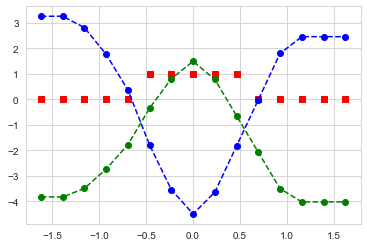

In [32]:
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x_train, y_train, c='r', marker='s')
plt.plot(x_train, logits[:,0], linestyle='--', marker='o', color='b')
plt.plot(x_train, logits[:,1], linestyle='--', marker='o', color='g')
plt.show()

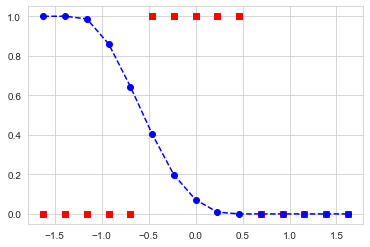

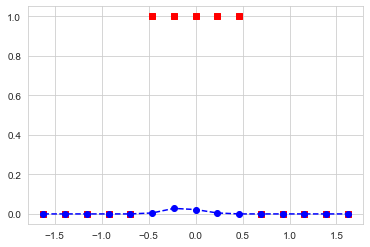

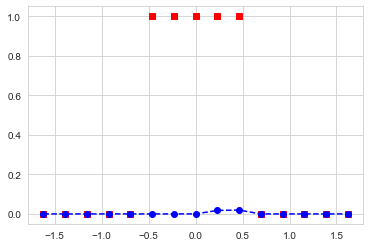

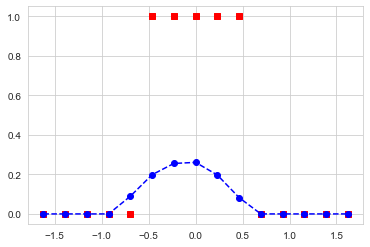

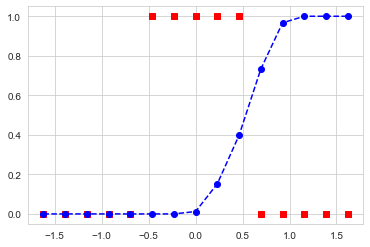

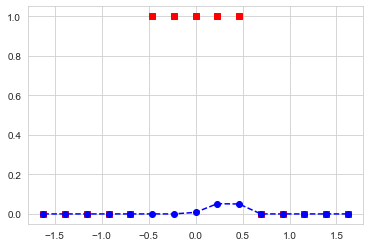

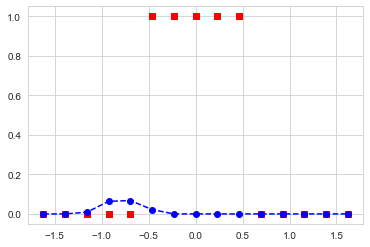

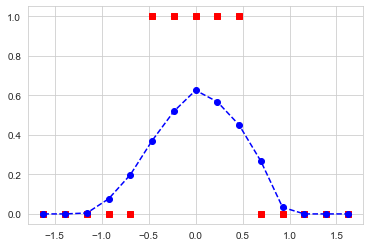

In [280]:
for i in range(path_prob.shape[1]):
    for j in range(path_prob.shape[2]):
        %matplotlib inline
        sns.set_style('whitegrid')
        plt.scatter(x_train, y_train, c='r', marker='s')
        plt.plot(x_train, path_prob[:,i,j], linestyle='--', marker='o', color='b')
        plt.show()

In [294]:
tf.reshape(path_prob, [15,8])

<tf.Tensor: shape=(15, 8), dtype=float32, numpy=
array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.986444  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00885062, 0.00470538],
       [0.8601096 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06349079, 0.07639958],
       [0.6441061 , 0.        , 0.        , 0.08966903, 0.        ,
        0.        , 0.06784181, 0.19838305],
       [0.40429264, 0.00484517, 0.        , 0.1983029 , 0.        ,
        0.        , 0.02190358, 0.37065572],
       [0.19787441, 0.02790379, 0.        , 0.2553281 , 0.        ,
        0.        , 0.        , 0.5188937 ],
       [0.07189916, 0.02212802, 0.        , 0.26074466, 0.0120576 ,
        0.00789034, 0.        , 0.6252802 ],
       [0.00906561, 0.00481918, 0.0177168 , 0.1

In [295]:
path_prob

<tf.Tensor: shape=(15, 4, 2), dtype=float32, numpy=
array([[[1.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[1.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.986444  , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.00885062, 0.00470538]],

       [[0.8601096 , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.06349079, 0.07639958]],

       [[0.6441061 , 0.        ],
        [0.        , 0.08966903],
        [0.        , 0.        ],
        [0.06784181, 0.19838305]],

       [[0.40429264, 0.00484517],
        [0.        , 0.1983029 ],
        [0.        , 0.        ],
        [0.02190358, 0.37065572]],

       [[0.19787441, 0.02790379],
        [0.        , 0.2553281 ],
        [0.        , 0.        ],
        [0.       